# Analysis
## Author: Sam Hersick
## Date: 4/14/25
## Purpose: <small>analyze the results from our two grid searches and find the effects that the hyper parameters had on different scoring metrics. Specifically we are looking at how these relationships are regarding imbalanced data.</small>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#style seaborn
sns.set_style('darkgrid')

# Load your results and fill in "blank" values with string "None"
# Pandas interprets None as missing value (NaN)
df_acc = pd.read_csv("rf_grid_accuracy.csv")
df_acc.fillna({"param_rf__class_weight": "None", "param_rf__max_depth": "None", "param_rf__max_features": "None"}, inplace=True)

df_f1 = pd.read_csv("rf_grid_f1.csv")
df_f1.fillna({"param_rf__class_weight": "None", "param_rf__max_depth": "None", "param_rf__max_features": "None"}, inplace=True)

In [2]:
#function for printing useful barplots for analyzing hyper parameters
#displays barplots for both accuracy and f1 datasets
def create_hyperparam_barplot(X, Y='mean_test_score', figsize=(6,3)):
    plt.figure(figsize=figsize)
    sns.barplot(data=df_acc,
                x=X,
                y=Y, 
                hue="param_rf__class_weight")
    plt.title(f"Accuracy - {Y} by {X} and class_weight")
    plt.legend(title="Class Weight")
    plt.show()

    plt.figure(figsize=(6, 3))
    sns.barplot(data=df_f1,
                x=X,
                y=Y, 
                hue="param_rf__class_weight")
    plt.title(f"f1 - {Y} by {X} and class_weight")
    plt.legend(title="Class Weight")
    plt.show()

# Analyzing grid search results for "accuracy" and "f1"
1. How good do the results appear to be based on the scoring?
2. How does the number of estimators affect overall accuracy?
3. How does max_features relate to accuracy?
4. How does max_features affect the time it took to fit the model?
5. Does oob_score affect the goodness of the model?
6. How does the hyperparameter you chose affect the results?

In [10]:
# How good do the results appear to be based on accuracy?
print(f"Accuracy test score results:\n{df_acc['mean_test_score'].describe()}")
print(f"\n\nf1 test score results:\n{df_f1['mean_test_score'].describe()}")

Accuracy test score results:
count    48.000000
mean      0.821896
std       0.065665
min       0.705230
25%       0.819090
50%       0.857190
75%       0.861131
max       0.864869
Name: mean_test_score, dtype: float64


f1 test score results:
count    48.000000
mean      0.257131
std       0.125542
min       0.011597
25%       0.218118
50%       0.236931
75%       0.320079
max       0.432065
Name: mean_test_score, dtype: float64


### Overview
Overall the test results appear to be very good when scored on accuracy, and very bad when scored on f1.

#### Accuracy results
- mean score: 0.821
- standard deviation: 0.065
- max score: 0.861 (best hyper parameter combination)

#### f1 results
- mean score: 0.257
- standard deviation: 0.1255
- max score: 0.432 (best hyper parameter combination)

#### Best Hyper Parameter Combination
- **Accuracy:** These numbers demonstrate a very accurate model when scored on accuracy, with our best hyperparameter combination scoring with almost 90% accuracy.
- **f1:** These numbers demonstrate a poor model. Even with the best hyper parameters producing a f1 score of 0.43 we still are very unhappy with the results.

#### High Performing Models  
- **Accuracy:** The top 25% of models (Q3 to max) achieved accuracy between **0.861 and 0.865**, indicating a narrow margin among the best configurations.
- **f1:** The top 25% of models (Q3 to max) achieved f1 between **0.32 and 0.43**, demonstrating lots of variation and spread.

#### Stand Deviation
- **Accuracy:** With a **standard deviation of 0.066**, most results are tightly clustered around the mean, particularly in the top half. This implies that tuning hyperparameters yields moderate gains once a baseline performance level is reached.
- **f1:** With a **standard deviation of 0.1255** we can clearly see lots of variation and spread between the performance of different hyper parameter combinations.

#### Class imbalance
Something super important to consider however is how well it is performing for each class.
- **Classes:** Class 1 data: **163751** observations, Class 0 data: **26509** observations

These following results can be found in accuracy_output.txt and f1_output.txt files.
- **Accuracy:** We saw good results for class 0 (precision: 0.87, recall: 0.98, f1: 0.93) but extremely poor performance on class 1 (precision: 0.56, recall: 0.13, f1: 0.22) espescially when it comes to recall and false negatives.
- **f1:** With f1 we saw a noticeable change in results. Class 0 (precision: 0.95, recall: 0.71, f1: 0.81) still performed well overall but dropped a few points from the accuracy grid search. Class 1 however(precision: 0.30, recall: 0.78, f1: 0.44) we saw a decrease in precision, but an increase in recall and f1. This means that overall we are predicting more positives. However, more of our class 1 predictions are wrong incorrect when we overall are predicting a greater amount of class 1's. This is because we are casting a larger net, overall scoring our gridsearch on f1 is helping the model overcome class imbalance by improving class 1 metrics. But as a whole the model is dropping from a 0.86 (accuracy grid search) accuracy, to a 0.72 (f1 grid search) accuracy.


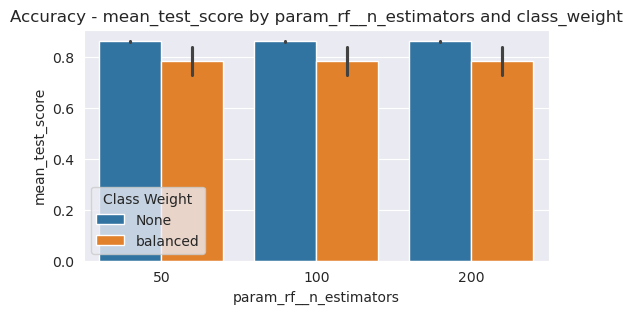

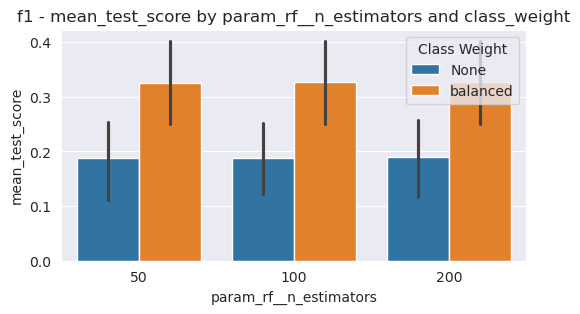

In [4]:
#bar plot for analyzing n_estimators
create_hyperparam_barplot(X='param_rf__n_estimators')

#### n_estimators
- **Accuracy**: We can see that changes in our n_estimators hyperparameter had essentially on impact. class_weight none performed slightly ahead of balanced, but the results were consistent across our 3 n_estimators
- **f1:** we can also see that changes to our n_estimators hyperparameter had no real impact. Class weight balanced is also seen noticably outperforming class weight None.

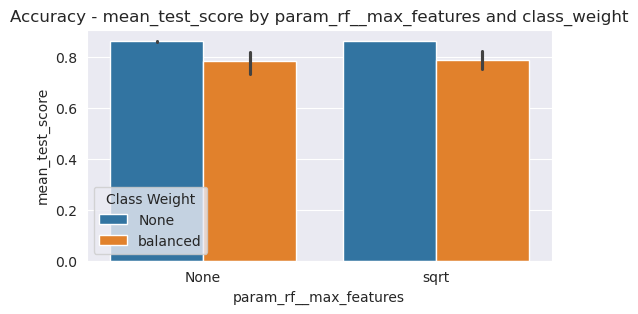

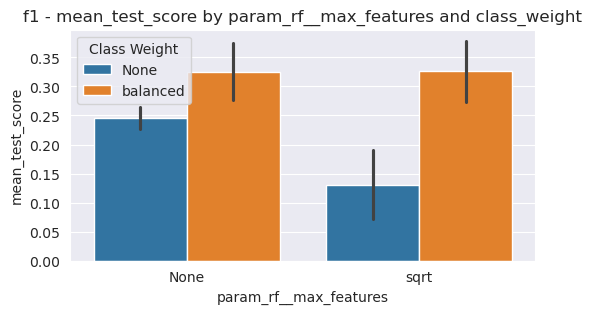

In [5]:
#bar plot for analyzing max_features on accuracy
create_hyperparam_barplot(X='param_rf__max_features')

#### max_features impact on accuracy
- **Accuracy:** Similar to n_estimators, max_features has very minimal impact upon the final test score. Class weight None slighlty outperformed class weight balanced.
- **f1:** Here we see that when setting our max_features to sqrt, we significantly decrease the accuracy of our models. This impact however only applies to class weight None, and with class weight balanced we actually see no change across the max_features hyperparameter. Class weight balanced greatly outperformed clas weight none.

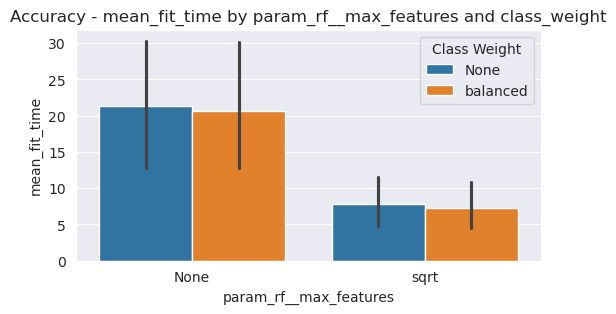

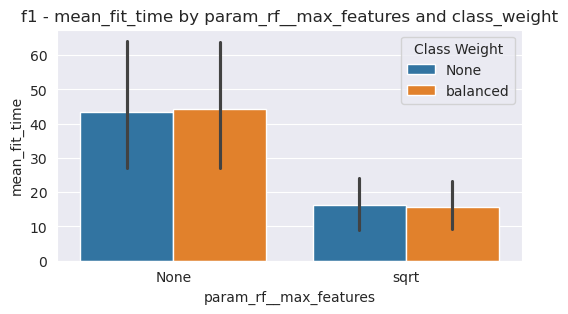

In [13]:
#bar plot for analyzing max_features, and how it effects the time taken to fit the model
create_hyperparam_barplot(X='param_rf__max_features', Y='mean_fit_time')

#### max_features impact on fit time
Here we can see the significant impact that max_features has on the fit time of the model for both accuracy and f1. 

- Using sqrt(n) max features the average fit time =  7.5 (accuracy), 16 (f1) seconds with a small standard deviation of 6 seconds (accuracy), 13 (f1).
- Using None for the max amount of features we get a mean fit of 21 (accuracy), 44 (f1) seconds with a larger standard deviation of 16 seconds (accuracy), 33 (f1).

Overall by limiting the maximum amount of features used, we can reduce the fitting times by a significant amount. This finiding is consistent across both class weights.

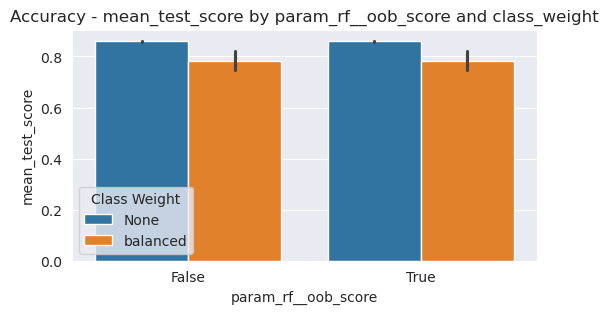

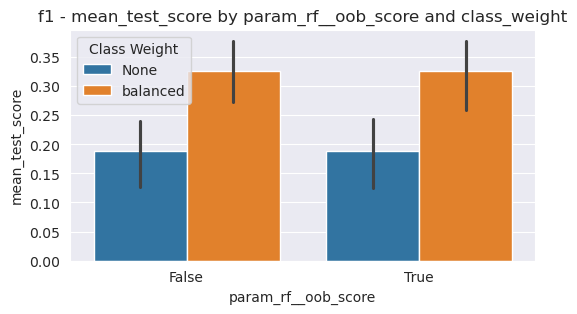

In [7]:
#bar plot for analyzing oob_score on accuracy
create_hyperparam_barplot(X='param_rf__oob_score')

#### oob_score impact on accuracy
Similar to n_estimators, whether oob_score was on or off had essentially no impact on the accuracy for both grid searches.
- **Accuracy:** class weight none slightly outperformed class weight balanced.
- **f1:** class weight balanced significantly outperformed class weight None.

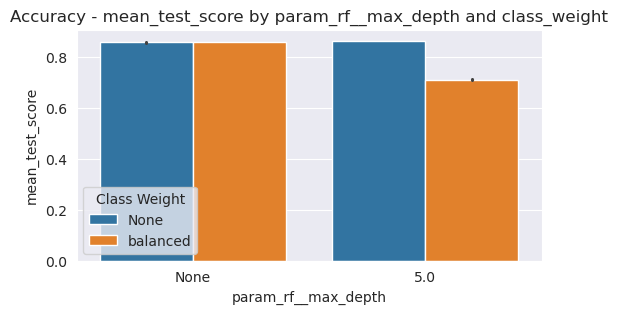

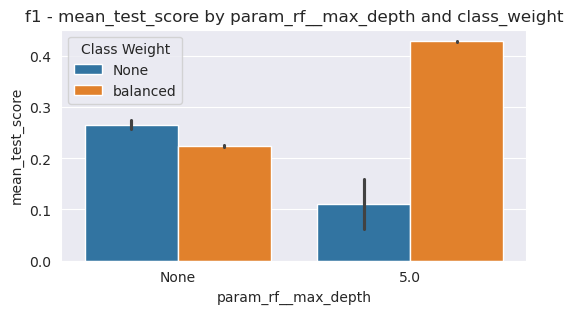

In [ ]:
#max depth vs score (hyper parameter that I chose)
create_hyperparam_barplot(X='param_rf__max_depth')

### Max Depth (score)
- **Accuracy:** we only saw a slight decrease in perfomance while limiting depth to 5 with balanced class_weight. Class weight none saw no change in performance.
- **f1:** we see a huge impact by max depth (biggest across all observed hyper parameter except debatably class weight). For class weight None, the score went down significantly when putting a max depth of 5. However with class weight balanced we got a huge spike in performance by making the max depth 5. here we can clearly see that the difference in max_depth is causing a high standard deviation amoung our f1 data.